## 1.Importing Necessary Libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## 2.Importing the data

In [119]:
cars = pd.read_csv('Cars.csv')
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3.Data Understanding

In [96]:
cars.shape

(81, 5)

In [97]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [98]:
cars.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [99]:
cars.describe(include='all')

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## 3[b] Check for the assumptions

### 3[b] 1. Linearity Check

* All the Independent Feautures(HP,VOL,SP,WT) need to be in linear relationship wrt the dependent(MPG) feautures


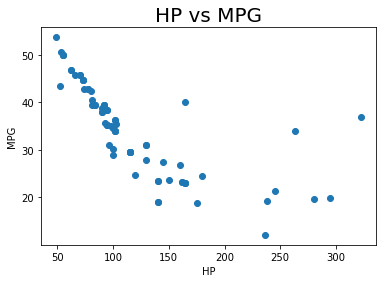

In [100]:
plt.title('HP vs MPG',size=20)
plt.xlabel('HP')
plt.ylabel('MPG')
plt.scatter(x='HP',y='MPG',data=cars)
plt.show()

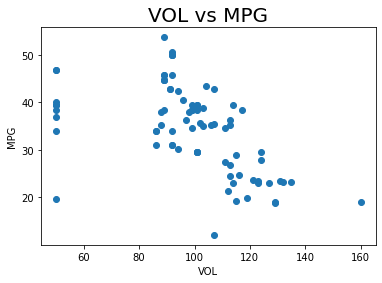

In [101]:
plt.title('VOL vs MPG',size=20)
plt.xlabel('VOL',)
plt.ylabel('MPG')
plt.scatter(x='VOL',y='MPG',data=cars)
plt.show()

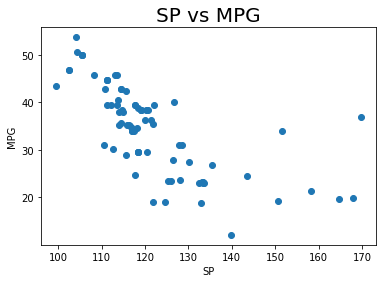

In [102]:
plt.title('SP vs MPG',size=20)
plt.xlabel('SP',)
plt.ylabel('MPG')
plt.scatter(x='SP',y='MPG',data=cars)
plt.show()

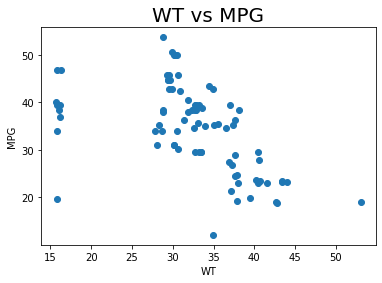

In [103]:
plt.title('WT vs MPG',size=20)
plt.xlabel('WT',)
plt.ylabel('MPG')
plt.scatter(x='WT',y='MPG',data=cars)
plt.show()

## Transformstion techniques 

### Why? - To convert this non linear correlated data to linearly correlated data wrt the output.

* 1.Log Transformation
* 2.Boxcox Transformation

### --------------------------------------------------------------------------------------------------------------

### Reference data for assumption check

In [11]:
cars.shape

(81, 5)

In [12]:
import numpy as np

#### Create Random numbers

In [13]:
random_numbers = np.random.rand(6,10) #0 to 1
random_numbers

array([[0.73688334, 0.51778919, 0.62842547, 0.11825008, 0.29277684,
        0.88997502, 0.32664832, 0.01169728, 0.24417965, 0.27087764],
       [0.02849584, 0.80270128, 0.35607131, 0.49531638, 0.20948515,
        0.39476209, 0.39816379, 0.10924053, 0.69070543, 0.06298743],
       [0.77739977, 0.68794343, 0.46061354, 0.67015086, 0.86255307,
        0.06805136, 0.25185367, 0.99786184, 0.51153425, 0.57319495],
       [0.76903889, 0.16649782, 0.38330868, 0.46204268, 0.47717825,
        0.78890306, 0.97202788, 0.73219743, 0.7181823 , 0.51369446],
       [0.96633118, 0.68751684, 0.70578934, 0.53379725, 0.74987611,
        0.07751906, 0.73244871, 0.65668895, 0.17165338, 0.95190886],
       [0.03164225, 0.11064002, 0.69435844, 0.12025994, 0.74781379,
        0.86201591, 0.8131772 , 0.52299146, 0.54053628, 0.65433503]])

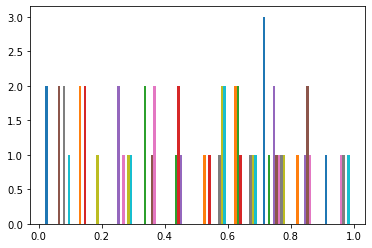

In [14]:
plt.hist(random_numbers)
plt.show()

In [15]:
np.random.seed(0)
random_numbers_normal_distributed = np.random.randn(8,8)
random_numbers_normal_distributed

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
         0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385,  1.53277921,
         1.46935877,  0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215,  0.15634897,  1.23029068,
         1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
        -0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656,  0.3869025 , -0.51080514,
        -1.18063218, -0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 , -0.63432209, -0.36274117, -0.67246045,
        -0.35955316, -0.81314628, -1.7262826 ]])

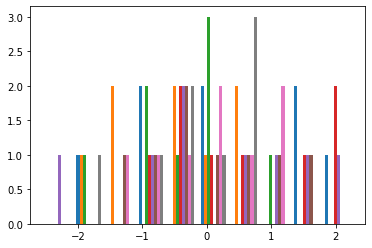

In [16]:
plt.hist(random_numbers_normal_distributed)
plt.show()

In [17]:
cars.shape

(81, 5)

In [18]:
np.random.seed(0)
no_of_obser = cars.shape[0] 
x = np.random.randn(no_of_obser)
y = x*10 + np.random.randn(no_of_obser)*2

In [19]:
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [20]:
y

array([ 19.44217643,   4.93289696,   6.71489247,  25.38543638,
        22.46735825,  -7.41521966,   9.1410345 ,  -3.65507733,
         1.07671494,   3.29963113,   3.88532585,  14.95928503,
         9.56365532,   1.92948296,   5.85177866,   3.35774332,
        18.51253172,  -1.79775845,   3.93465574,  -4.774656  ,
       -28.22541628,   3.99521596,  10.5831554 ,  -9.76789701,
        26.58478861, -15.37089471,  -1.03732445,   1.97404555,
        18.28882173,  18.42870562,   3.36156357,   2.05917383,
        -5.05772757, -20.34397142,  -1.8742087 ,   3.45799363,
        11.99288662,  13.25195723,  -2.02885483,  -2.27017644,
       -12.68433123, -13.60370302, -14.40993011,  18.11861823,
        -5.3957909 ,  -5.25105012,  -8.82942614,   9.11949307,
       -15.3240548 ,  -3.66723495,  -7.87616723,   2.52035966,
        -5.04439026, -13.078014  ,   1.07104431,   5.43650034,
         0.24857471,   3.8167324 ,  -8.52934395,  -6.60992685,
        -5.84582108,  -3.26218462,  -6.86139995, -12.49

In [21]:
dummy_data = pd.DataFrame([x,y]).T
dummy_data.columns = ['X','Y']
dummy_data

,X,Y
0,1.764052,19.442176
1,0.400157,4.932897
2,0.978738,6.714892
3,2.240893,25.385436
4,1.867558,22.467358
...,...,...
76,-0.870797,-10.867835
77,-0.578850,-8.083434
78,-0.311553,-3.991165
79,0.056165,-0.434411


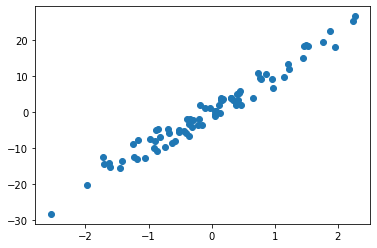

In [22]:
plt.scatter(x='X',y='Y',data=dummy_data)
plt.show()

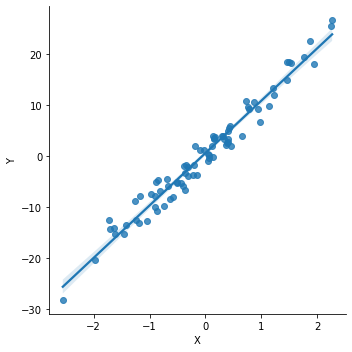

In [23]:
sns.lmplot(x='X',y='Y',data=dummy_data)
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------

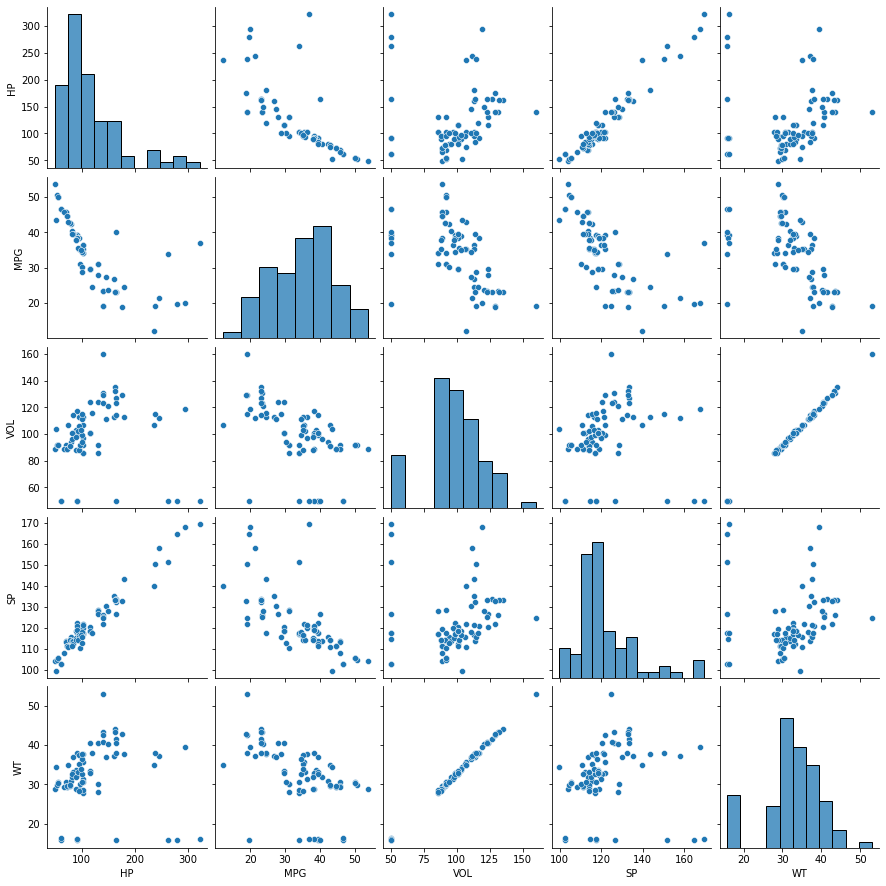

In [24]:
sns.pairplot(cars)

In [25]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


## 3[b]2.Homoscedasticity 
* There should be a similar variance in my dataset

## 3[b]3.Multicollinearity
* There should be no multicollinearity i.e  No dependency between the input feautures

In [26]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### 3[b]4.No Auto Regression
* No time Influence

### 3[b]5.Zero Residual Mean

#### For cars data

In [27]:
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

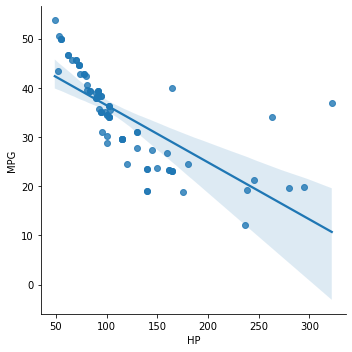

In [28]:
sns.lmplot(x='HP',y='MPG',data=cars)
plt.show()

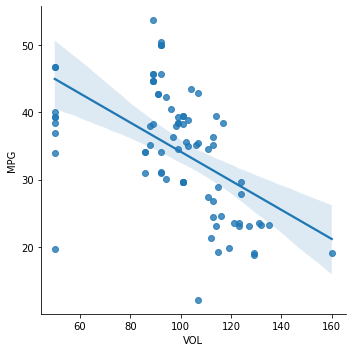

In [29]:
sns.lmplot(x='VOL',y='MPG',data=cars)
plt.show()

## 4.Data Preparation

In [104]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 5.Model Building

In [105]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [120]:
X = cars.drop(labels=['MPG'],axis=1)
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [121]:
y = cars[['MPG']]
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


### 6.Model Training

In [108]:
linear_model = LinearRegression()
#dt_model = DecisionTreeRegressor()


linear_model.fit(X,y) #Training 
#dt_model.fit(X,y)

LinearRegression()

In [109]:
linear_model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [110]:
linear_model.intercept_

array([30.67733585])

### 7.Model Testing

In [111]:
y_pred = linear_model.predict(X)
y_pred
#y_pred = dt_model.predict(X)
#y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

## 8.Model Evaluation

In [112]:
mean_squared_error(y_true = y,y_pred = y_pred) #if mse=0 then this is good model

18.89714115234311

## Model Improvement with Linear Regression

### With Log Transformation

In [113]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [40]:
cars['log_HP']  = np.log(cars['HP'])
cars['log_VOL'] = np.log(cars['VOL'])
cars['log_SP']  = np.log(cars['SP'])
cars['log_WT']  = np.log(cars['WT'])
cars

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


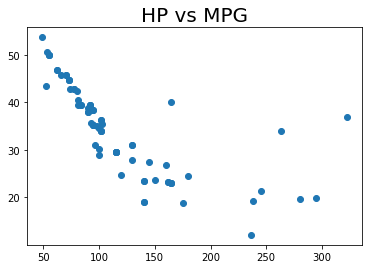

In [41]:
plt.title('HP vs MPG',size=20)
plt.scatter(x='HP',y='MPG',data=cars)
plt.show()

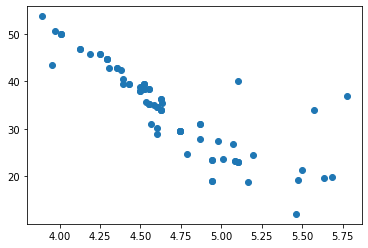

In [42]:
plt.scatter(x='log_HP',y='MPG',data=cars)
plt.show()

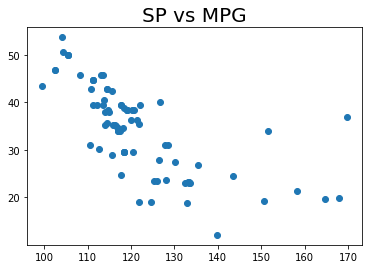

In [43]:
plt.title('SP vs MPG',size=20)
plt.scatter(x='SP',y='MPG',data=cars)
plt.show()

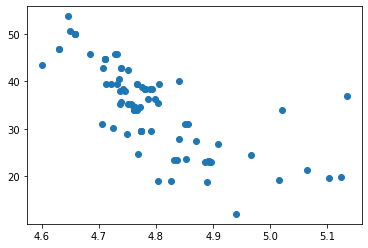

In [44]:
plt.scatter(x='log_SP',y='MPG',data=cars)
plt.show()

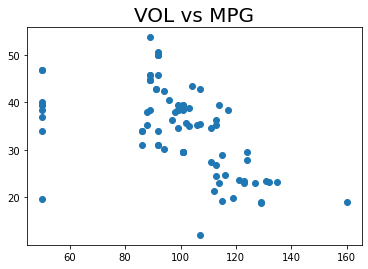

In [45]:
plt.title('VOL vs MPG',size=20)
plt.scatter(x='VOL',y='MPG',data=cars)
plt.show()

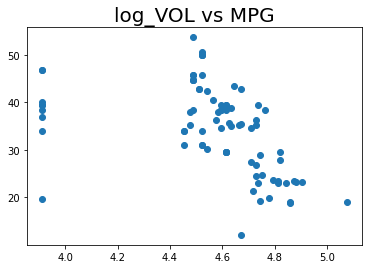

In [46]:
plt.title('log_VOL vs MPG',size=20)
plt.scatter(x='log_VOL',y='MPG',data=cars)
plt.show()

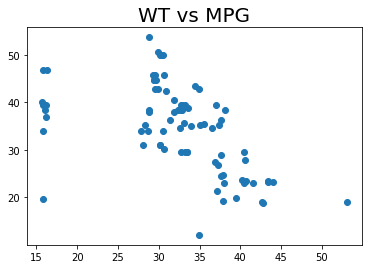

In [47]:
plt.title('WT vs MPG',size=20)
plt.scatter(x='WT',y='MPG',data=cars)
plt.show()

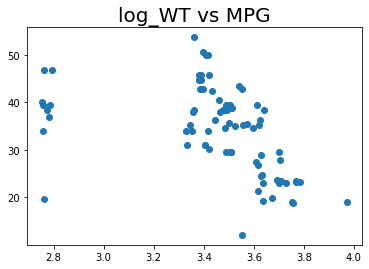

In [48]:
plt.title('log_WT vs MPG',size=20)
plt.scatter(x='log_WT',y='MPG',data=cars)
plt.show()

### Model Building using Log Transform inputs

In [75]:
X = cars.iloc[:,5:]
y = cars[['MPG']]

In [76]:
linear_model = LinearRegression()
linear_model.fit(X,y) # Training
y_pred = linear_model.predict(X)
mean_squared_error(y,y_pred)

7.265426998341584

### Lets remove the correlated varialbeles and check whether it is impacting the mse(Mean Square Error)

In [51]:
corr = cars.corr().round(2)
corr

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
HP,1.00,-0.73,0.08,0.97,0.08,0.96,-0.01,0.97,-0.01
MPG,-0.73,1.00,-0.53,-0.69,-0.53,-0.84,-0.45,-0.72,-0.44
VOL,0.08,-0.53,1.00,0.10,1.00,0.19,0.98,0.14,0.98
SP,0.97,-0.69,0.10,1.00,0.10,0.94,0.03,1.00,0.02
WT,0.08,-0.53,1.00,0.10,1.00,0.19,0.98,0.14,0.98
log_HP,0.96,-0.84,0.19,0.94,0.19,1.00,0.11,0.96,0.10
log_VOL,-0.01,-0.45,0.98,0.03,0.98,0.11,1.00,0.06,1.00
log_SP,0.97,-0.72,0.14,1.00,0.14,0.96,0.06,1.00,0.06
log_WT,-0.01,-0.44,0.98,0.02,0.98,0.10,1.00,0.06,1.00


<AxesSubplot:>

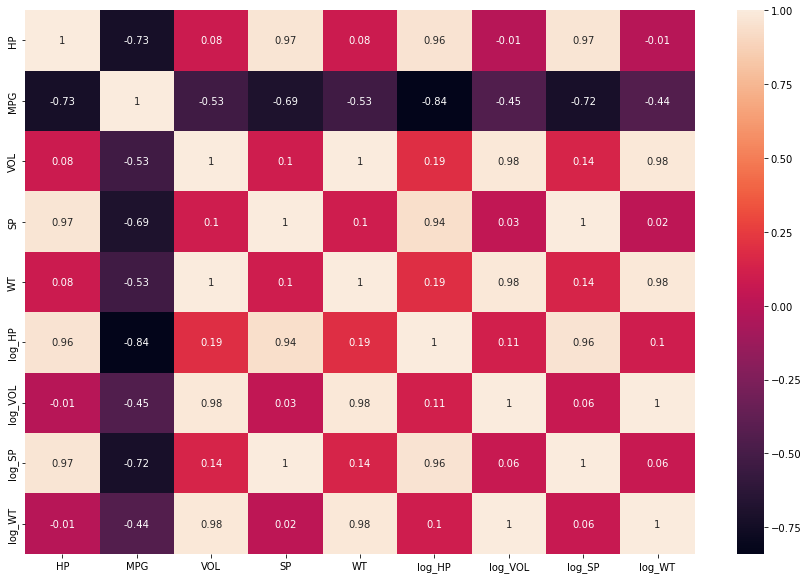

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [53]:
X = cars.loc[:,['log_HP','log_WT','log_VOL']]
y = cars[['MPG']]

In [54]:
X

,log_HP,log_WT,log_VOL
0,3.891820,3.359057,4.488636
1,4.007333,3.416639,4.521789
2,4.007333,3.407630,4.521789
3,4.248495,3.422049,4.521789
4,3.970292,3.397495,4.521789
...,...,...,...
76,5.774552,2.780864,3.912023
77,5.472271,3.635561,4.744932
78,5.572154,2.758086,3.912023
79,5.686975,3.674352,4.779123


In [55]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [56]:
linear_model = LinearRegression()
linear_model.fit(X,y) # Training

LinearRegression()

In [57]:
y_pred = linear_model.predict(X)

In [58]:
mean_squared_error(y,y_pred)

13.00669236550123

### Best Approach in Model Buildingm

In [114]:
X = cars.iloc[:,5:]
y = cars[['MPG']]

In [115]:
X.shape,y.shape

((81, 0), (81, 1))

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [127]:
X_train

,HP,VOL,SP,WT
59,100,115,115.576579,37.662874
63,140,123,125.312342,40.722831
28,52,104,99.564907,34.483207
40,95,113,116.392639,37.392524
43,95,88,114.093383,28.343976
...,...,...,...,...
3,70,92,113.461264,30.632114
2,55,92,105.461264,30.193597
6,55,92,105.461264,30.308480
27,92,99,119.105055,32.835069


In [91]:
y_train

,MPG
59,28.860225
63,23.515917
28,43.469434
40,35.152727
43,35.152727
...,...
3,45.696322
2,50.013401
6,50.013401
27,38.411003


In [81]:
X_test

,log_HP,log_VOL,log_SP,log_WT
57,4.744932,4.615121,4.773131,3.488430
12,4.521789,4.595120,4.804882,3.490843
14,4.189655,4.488636,4.683846,3.379200
7,4.127134,3.912023,4.630823,2.763028
42,4.624973,4.521789,4.766109,3.418626
41,4.553877,4.663439,4.751423,3.556124
8,4.127134,3.912023,4.630823,2.794808
68,5.105945,4.812184,4.892695,3.700611
29,4.634729,4.672829,4.802715,3.570922
17,4.521789,3.912023,4.767276,2.784648


In [65]:
y_test

,MPG
57,29.629936
12,39.354094
14,45.734893
7,46.716554
42,34.070668
41,35.152727
8,46.716554
68,23.103172
29,35.404192
17,39.354094


In [66]:
# Training Data
X_train.shape,y_train.shape

((64, 4), (64, 1))

In [67]:
# Test Data
X_test.shape,y_test.shape

((17, 4), (17, 1))

In [71]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train) # Training

LinearRegression()

In [72]:
#Training data error
y_pred_train = linear_model.predict(X_train)
mean_squared_error(y_train,y_pred_train)

5.145508775005979

In [73]:
#test data error
y_pred = linear_model.predict(X_test)
mean_squared_error(y_test,y_pred)

22.129661504991383

## TASK

* Q-Q Plots
* Residual Plots

#### Next day Class

In [128]:
X_train

,HP,VOL,SP,WT
59,100,115,115.576579,37.662874
63,140,123,125.312342,40.722831
28,52,104,99.564907,34.483207
40,95,113,116.392639,37.392524
43,95,88,114.093383,28.343976
...,...,...,...,...
3,70,92,113.461264,30.632114
2,55,92,105.461264,30.193597
6,55,92,105.461264,30.308480
27,92,99,119.105055,32.835069


In [129]:
X_test

,HP,VOL,SP,WT
57,115,101,118.288996,32.734518
12,92,99,122.105055,32.813592
14,66,89,108.185353,29.347279
7,62,50,102.598513,15.847758
42,102,92,117.461264,30.527427
41,95,106,115.748847,35.027176
8,62,50,102.598513,16.359484
68,165,123,133.312342,40.472042
29,103,107,121.840817,35.549360
17,92,50,117.598513,16.194122


In [130]:
y_train

,MPG
59,28.860225
63,23.515917
28,43.469434
40,35.152727
43,35.152727
...,...
3,45.696322
2,50.013401
6,50.013401
27,38.411003


In [131]:
y_test

,MPG
57,29.629936
12,39.354094
14,45.734893
7,46.716554
42,34.070668
41,35.152727
8,46.716554
68,23.103172
29,35.404192
17,39.354094


In [132]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train) # Training

LinearRegression()

In [133]:
#Training data error
y_pred_train = linear_model.predict(X_train)
mean_squared_error(y_train,y_pred_train) 

19.136456810926465

In [134]:
#test data error
y_pred = linear_model.predict(X_test)
mean_squared_error(y_test,y_pred)

23.457874597619092

In [135]:
X_train.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

### Check for Homoscadascity

In [139]:
#error = y_pred_train - X_train['HP']
error = X_train['HP'].values - y_pred_train

In [ ]:
plt.scatter()

In [137]:
X_train[['HP']]

,HP
59,100
63,140
28,52
40,95
43,95
...,...
3,70
2,55
6,55
27,92
